<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
from sklearn.decomposition import PCA
import numpy as np
import scipy
from sklearn.datasets import load_iris
from sklearn.utils.extmath import svd_flip
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# X_iris, y_iris = load_iris(return_X_y=True)
iris=load_iris()
X_iris=iris.data
y =iris.target
y_categories_names=iris.target_names

# Principal components analysis (PCA)

In this tutorials, we will explore one of the most widely used unsupervised algorithm known as principal component analysis denoted a PCA, A technique for finding patterns in data of high dimension, useful in exploratory data analysis, allowing data visualization, feature extraction and has found application in fields such as face recognition and image compression.

Suppose you have a dataset containing several variables that are possibly correlated and you want to reduced these correlated variables into a few set of uncorrelated variables. With PCA, it will reduce these correlated variables into few set of uncorrelated variables that collectively explain most of the variability in the original set. **The information in the given dataset corresponds to the total variation it contains and the goal of PCA is to identify the principal directions or principal components along which the variation in the dataset is maximal**.


# Principal Components Analysis

**Principal components analysis denoted as PCA is a dimensionality reduction technique that transforms a larger number of possibly correlated variables which indicate redundancy within the dataset into a set of few new uncorrelated (orthogonal) variables called principal components (PCs) where each component is a linear combination of the original variables**. Variables which correlate with one another will contribute strongly to the same principal component. Each principal component retain a certain percentage of the total variation in the dataset and these components are ordered according to the fraction or percentage of the total information or variation the component retain with the first principal component containing the largest percentage of the variation. The amount of information in each component is measured by the ***Eigenvalues/variances of the PCs***.

> when the data is projected onto a lower dimensional linear space the variance of the projected data is maximized

# EIGEN-DECOMPOSITION


## Principal Components

steps involve in computing the principal components are as follow,

First we calculate the variance-covariance matrix of the data which involves the following.

the covariance between x and y is given as

$$
cov(x,y)=\frac{\sum_{i=1}^{n} (x_{i}- \bar x)(y_{i}-\bar y)}{n-1}
$$

and that of x which is just the variance of x

$$
cov(x,x)=var(x)=\frac{\sum_{i=1}^{n} (x_{i}- \bar x)(x_{i}-\bar x)}{n-1}=\frac{\sum_{i=1}^{n} (x_{i}- \bar x))^{2}}{n-1}
$$


Hence the sample variance-covariance matrix  variance-covariance matrix of a data with three dimension namely **x, y, z** is given as

$$COV(x,y,z)=S =\left[ \begin{array}{ccc}
cov(x,x) & cov(x,y) & cov(x,z) \\
cov(y,x) & cov(y,y) & cov(y,z) \\
cov(z,x) & cov(z,y) & cov(z,z) 
\end{array}\right] $$


We then find the eigenvalues and eigenvectors of this covariance matrix. It turns out that the eigenvector with the highest eigenvalue is the first principle component of the dataset and in that order.


Compute the eigenvalues  $\lambda_1,\lambda_2,\dots,\lambda_d $ Of sample variance-covariance matrix $S$ and the and the corresponding eigenvectors  $ \alpha_1,\alpha_1,\cdots,\alpha_d  $ we then define our estimated principal components using the eigenvectors as our coefficients:

Using the coefficients or loadings of the principal components, we can project the observations on the axis of the principal component using 

$$ \hat{Y}=XA$$ where

$A$ is the matrix of the coefficients of $\alpha$ 


the projections are called scores.

# Eigenvalues / Variances

The amount of variation retained by each principal component are measured by the eigenvalues and since the PCs are ordered in a descending order according to the information they retained, the first PC corresponds to the directions with the maximum amount of variation in the data set and hence has the largest eigenvalue (That is the eigenvalue with the highest  eigenvector is the first principle component ). let us now examine the eigenvalues to determine the number of principal components to be considered.



In [34]:
def My_PCAA(X):
    X-=np.mean(X,axis=0)
    con_mat=X.transpose()@X
    eig_va,eigen_vec=np.linalg.eig(con_mat)
    return np.dot(X,eigen_vec),eigen_vec

In [35]:
X_trans,components=My_PCAA(X_iris)

In [36]:
components

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

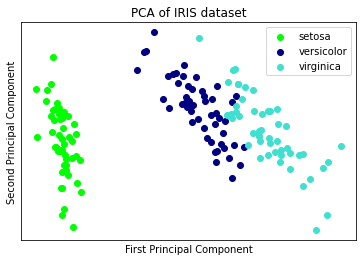

In [37]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_trans[:,0][y==i]
    pc2=X_trans[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


# SVD Decomposition
Suppose that a matrix A is singular or nearly. Let $A= m × n$ matrix of rank r, with m ≥ n. The singular value decomposition of A is

$$A = UDV^{T}$$
where

U is an orthogonal m × n matrix, D is an r × r diagonal matrix, and V is an n × n square orthogonal matrix.
From the last chapter we recall that since
U and V are orthogonal, then
$UU^{T} = VV^{T} = I$

The elements along the diagonal of D  are called the singular values of A. 


The columns of $V$ are principal directions/axes/components. The principal components scores is given by $UD$

In [38]:
def PCA_SVD(X,n_components=None):
    if n_components is not None:
        assert 1<=n_components<=X.shape[1]
    else:
        n_components=X.shape[1]
    X-=np.mean(X,axis=0)
    U,D,Vt=scipy.linalg.svd(X,full_matrices=False)
    U,Vt=svd_flip(U,Vt)
    U=U[:,:n_components]
    U*=D[:n_components]
    PCs=Vt
    return U,PCs

In [39]:
X_transformed,components=PCA_SVD(X_iris)

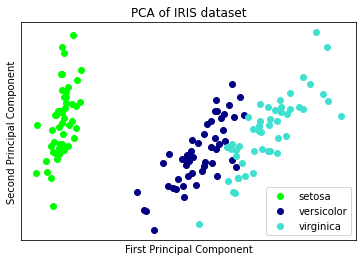

In [40]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_transformed[:,0][y==i]
    pc2=X_transformed[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


In [42]:
components

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

# USING SCIKIT-LEARN

In [41]:
pca = PCA()
pca.fit(X_iris)

PCA()

In [43]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [44]:
X_transformed_sk=pca.transform(X_iris)

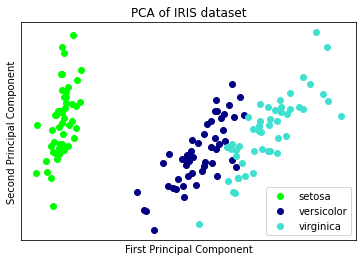

In [45]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_transformed_sk[:,0][y==i]
    pc2=X_transformed_sk[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


Percentage of variance explained for each components

In [53]:
print("explained variance ratio for the first two components : %s" %pca.explained_variance_ratio_)

explained variance ratio for the first two components : [0.92461872 0.05306648 0.01710261 0.00521218]


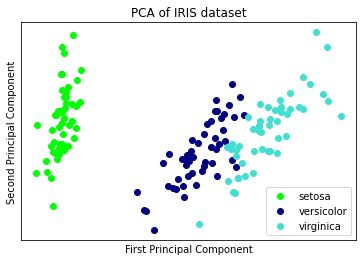

In [54]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_transformed[:,0][y==i]
    pc2=X_transformed[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


<a href='https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html'>In Depth: Principal Component Analysis</a>


[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis "wikipeida")

[Application of Principal Component Analysis to Image Compression](https://www.intechopen.com/books/statistics-growing-data-sets-and-growing-demand-for-statistics/application-of-principal-component-analysis-to-image-compression "By Wilmar Hernandez and Alfredo Mendez")

<a href=''></a>

<a href=''></a>

<a href=''></a>

<a href=''></a>

<a href=''></a>